In [1]:
import os,sys, pathlib, time, subprocess
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
import re
folder_path = pathlib.Path().resolve()
print("Current folder path:", folder_path)

sizes = []
times = []
steps = []
step_pattern = re.compile(r"\s*\d+\s*:")


Current folder path: /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani


In [2]:

max_time = 60  # Tiempo máximo en segundos para cada resolución
size = 2
time_exceeded = False

problem_path = folder_path / "Ejercicio1/Problemas"
if not problem_path.exists():
    os.makedirs(problem_path)

pbar = tqdm(desc="Resolviendo tamaños", unit="problema", position=0, leave=True)
while not time_exceeded:
    pbar.set_description(f"Tamaño actual: {size}")
    # Generar el problema con los parámetros actuales
    gen_cmd = f"python3 {folder_path}/generate_problem.py -d 1 -r 0 -k 2 -l {size} -p {size} -c {size} -g {size} -v 0"
    pbar.write(f"\n[INFO] Generando problema para tamaño {size}...")
    os.system(gen_cmd)
    pddl_files = sorted(problem_path.glob("*.pddl"), key=os.path.getmtime, reverse=True)
    if not pddl_files:
        pbar.write("[ERROR] No se encontró el archivo .pddl generado.")
        break
    problem_pddl = pddl_files[0]
    planificador_cmd = [
        f"{folder_path}/planificadores/ff",
        "-o", f"{folder_path}/Ejercicio1/dron-domain.pddl",
        "-f", str(problem_pddl)
    ]
    start = time.time()
    try:
        result = subprocess.run(planificador_cmd, timeout=max_time, capture_output=True, text=True)
        elapsed = time.time() - start
        if result.returncode == 0:
            max_size = size
            sizes.append(size)
            times.append(elapsed)
            result_lines = result.stdout.splitlines()
            step_count = 1
            for line in result.stdout.splitlines():
                if step_pattern.match(line):
                    step_count += 1
            steps.append(step_count)
            
            pbar.write(f"[OK] Plan encontrado para tamaño {size} en {elapsed:.4f} segundos con {step_count} pasos.")
            pbar.set_postfix({"Tiempo": f"{elapsed:.2f}s", "Tamaño": size})
            size += 1
            pbar.update(1)
        else:
            time_exceeded = True
    except subprocess.TimeoutExpired:
        pbar.write(f"[TIMEOUT] Tiempo excedido ({max_time}s) para tamaño {size}.")
        time_exceeded = True    
    os.remove(problem_pddl)

pbar.close()
print(f"\n>>> El mayor tamaño resuelto en menos de 1 minuto es: {max_size}")



Resolviendo tamaños: 0problema [00:00, ?problema/s]


[INFO] Generando problema para tamaño 2...
[OK] Plan encontrado para tamaño 2 en 0.0024 segundos con 8 pasos.

[INFO] Generando problema para tamaño 3...
[OK] Plan encontrado para tamaño 3 en 0.0025 segundos con 9 pasos.

[INFO] Generando problema para tamaño 4...
[OK] Plan encontrado para tamaño 4 en 0.0026 segundos con 16 pasos.

[INFO] Generando problema para tamaño 5...
[OK] Plan encontrado para tamaño 5 en 0.0029 segundos con 19 pasos.

[INFO] Generando problema para tamaño 6...
[OK] Plan encontrado para tamaño 6 en 0.0037 segundos con 23 pasos.

[INFO] Generando problema para tamaño 7...
[OK] Plan encontrado para tamaño 7 en 0.0046 segundos con 27 pasos.

[INFO] Generando problema para tamaño 8...
[OK] Plan encontrado para tamaño 8 en 0.0053 segundos con 30 pasos.

[INFO] Generando problema para tamaño 9...
[OK] Plan encontrado para tamaño 9 en 0.0068 segundos con 36 pasos.

[INFO] Generando problema para tamaño 10...
[OK] Plan encontrado para tamaño 10 en 0.0084 segundos con 39

In [3]:

max_time = 60  # Tiempo máximo en segundos para cada resolución
size = 86
time_exceeded = False

problem_path = folder_path / "Ejercicio1/Problemas"
if not problem_path.exists():
    os.makedirs(problem_path)

pbar = tqdm(desc="Resolviendo tamaños", unit="problema", position=0, leave=True)
while not time_exceeded:
    pbar.set_description(f"Tamaño actual: {size}")
    # Generar el problema con los parámetros actuales
    gen_cmd = f"python3 {folder_path}/generate_problem.py -d 1 -r 0 -k 2 -l {size} -p {size} -c {size} -g {size} -v 0"
    pbar.write(f"\n[INFO] Generando problema para tamaño {size}...")
    os.system(gen_cmd)
    pddl_files = sorted(problem_path.glob("*.pddl"), key=os.path.getmtime, reverse=True)
    if not pddl_files:
        pbar.write("[ERROR] No se encontró el archivo .pddl generado.")
        break
    problem_pddl = pddl_files[0]
    planificador_cmd = [
        f"{folder_path}/planificadores/ff",
        "-o", f"{folder_path}/Ejercicio1/dron-domain.pddl",
        "-f", str(problem_pddl)
    ]
    start = time.time()
    try:
        result = subprocess.run(planificador_cmd, timeout=max_time, capture_output=True, text=True)
        elapsed = time.time() - start
        if result.returncode == 0:
            max_size = size
            sizes.append(size)
            times.append(elapsed)
            result_lines = result.stdout.splitlines()
            step_count = 1
            for line in result.stdout.splitlines():
                if step_pattern.match(line):
                    step_count += 1
            steps.append(step_count)
            
            pbar.write(f"[OK] Plan encontrado para tamaño {size} en {elapsed:.4f} segundos con {step_count} pasos.")
            pbar.set_postfix({"Tiempo": f"{elapsed:.2f}s", "Tamaño": size})
            size += 1
            pbar.update(1)
        else:
            time_exceeded = True
    except subprocess.TimeoutExpired:
        pbar.write(f"[TIMEOUT] Tiempo excedido ({max_time}s) para tamaño {size}.")
        time_exceeded = True    
    os.remove(problem_pddl)

pbar.close()
print(f"\n>>> El mayor tamaño resuelto en menos de 1 minuto es: {max_size}")



Resolviendo tamaños: 0problema [00:00, ?problema/s]


[INFO] Generando problema para tamaño 86...
[OK] Plan encontrado para tamaño 86 en 40.4376 segundos con 314 pasos.

[INFO] Generando problema para tamaño 87...
[OK] Plan encontrado para tamaño 87 en 42.5079 segundos con 315 pasos.

[INFO] Generando problema para tamaño 88...
[TIMEOUT] Tiempo excedido (60s) para tamaño 88.

>>> El mayor tamaño resuelto en menos de 1 minuto es: 87


In [4]:
# import re
# import time
# import subprocess
# import os
# from pathlib import Path

# # Definir parámetros del problema
# drones = 1
# locations = 91
# personas = 91
# cajas = 91
# metas = 91
# capacidad_drones = 2
# carriers = 0
# folder_path = Path('.')  # Ajusta según tu carpeta
# problem_path = folder_path / "Ejercicio1/Problemas"
# if not problem_path.exists():
#     os.makedirs(problem_path)

# # Generar el problema
# gen_cmd = f"python3 {folder_path}/generate_problem.py -d {drones} -l {locations} -p {personas} -c {cajas} -g {metas} -k {capacidad_drones} -r {carriers} -v 0"
# os.system(gen_cmd)

# # Buscar el archivo .pddl generado más reciente
# pddl_files = sorted(problem_path.glob("*.pddl"), key=os.path.getmtime, reverse=True)
# if not pddl_files:
#     print("No se encontró el archivo .pddl generado.")
# else:
#     problem_pddl = pddl_files[0]
#     planificador_cmd = f"{folder_path}/planificadores/ff -o {folder_path}/Ejercicio1/dron-domain.pddl -f {problem_pddl}"
#     start = time.time()
#     result = subprocess.run(planificador_cmd, shell=True, capture_output=True, text=True)
#     elapsed = time.time() - start
#     if result.returncode == 0:
#         print("Planificador ejecutado correctamente.")
#         step_pattern = re.compile(r"\s*\d+\s*:")
#         step_count = 1
#         for line in result.stdout.splitlines():
#             if step_pattern.match(line):
#                 step_count += 1
#         times.append(elapsed)
#         sizes.append(locations)
#         steps.append(step_count)

#         print(f"Plan encontrado en {elapsed:.4f} segundos.")
#         print(f"Número de pasos del plan: {step_count}")
#     else:
#         print("Error al ejecutar el planificador:", result.stderr.strip())


In [5]:
print(sizes)
print(times)
print(steps)
print(len(sizes), len(times), len(steps))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 86, 87]
[0.002402782440185547, 0.0025205612182617188, 0.0026335716247558594, 0.002856016159057617, 0.0036754608154296875, 0.004589557647705078, 0.005307197570800781, 0.006781101226806641, 0.008414745330810547, 0.011588335037231445, 0.014172554016113281, 0.020766019821166992, 0.025623321533203125, 0.026921510696411133, 0.03624892234802246, 0.06466913223266602, 0.051920413970947266, 0.05376434326171875, 0.1016530990600586, 0.1007835865020752, 0.1816394329071045, 0.11606240272521973, 0.11192893981933594, 0.2087559700012207, 0.28283166885375977, 0.271129846572876, 0.2599937915802002, 0.3654658794403076, 0.3063232898712158, 0.5470883846282959, 0.3286440372467041, 0.4945104122161865, 0.59

In [6]:
results_csv_path = folder_path / "Ejercicio1/resultadosff.csv"
new_df = pd.DataFrame({'Tamaño': sizes, 'Tiempo (s)': times, 'Pasos': steps})

if results_csv_path.exists():
    old_df = pd.read_csv(results_csv_path)
    combined_df = pd.concat([old_df, new_df], ignore_index=True)

    # Calcular la media de tiempo por tamaño
    tiempo_df = combined_df.groupby('Tamaño', as_index=False)['Tiempo (s)'].mean()

    # Obtener el máximo de pasos por tamaño
    pasos_df = combined_df.groupby('Tamaño', as_index=False)['Pasos'].max()

    # Unir ambos resultados en un solo DataFrame
    final_df = tiempo_df.merge(pasos_df, on='Tamaño')
else:
    final_df = new_df

final_df.to_csv(results_csv_path, index=False)
print(f"Resultados exportados a {results_csv_path}")


Resultados exportados a /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/Ejercicio1/resultadosff.csv


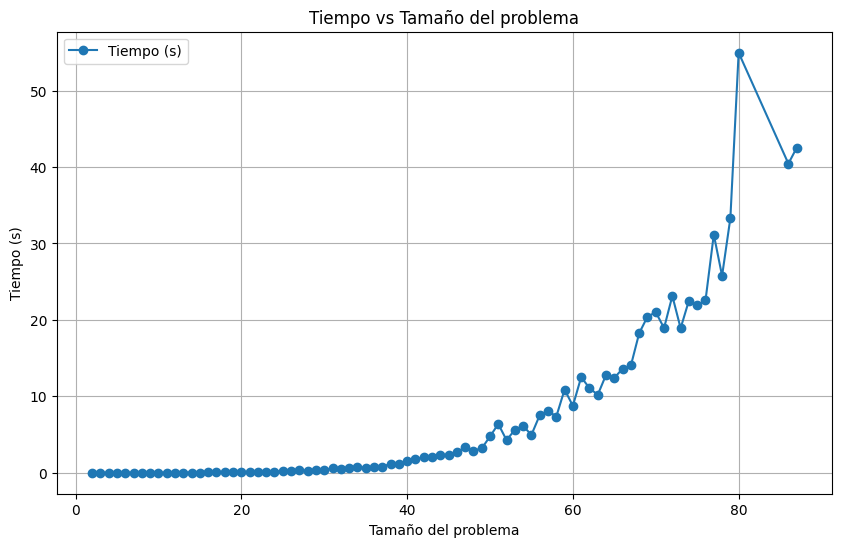

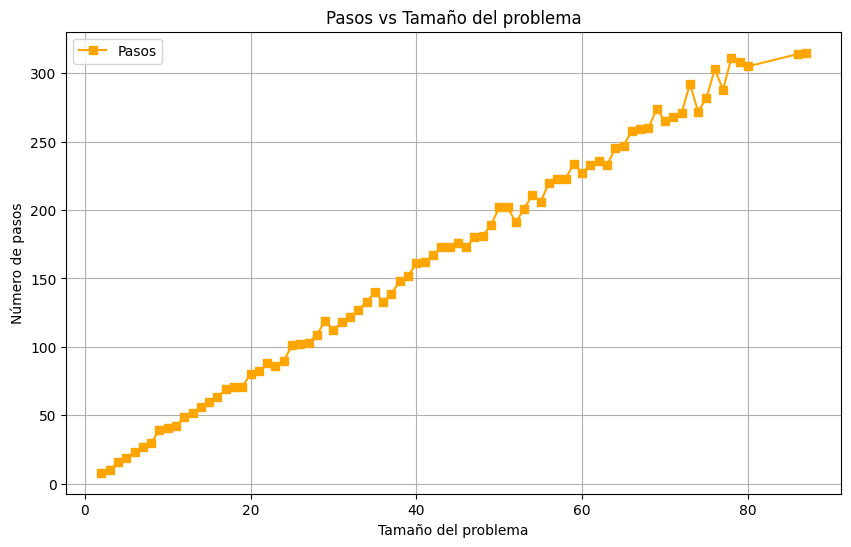

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar resultados
results = pd.read_csv(results_csv_path)

sizes = results['Tamaño']
times = results['Tiempo (s)']

# Comprobar columna de pasos (y descartar filas nulas)
if 'Pasos' in results.columns:
    steps = results['Pasos'].dropna()
    sizes_steps = results.loc[results['Pasos'].notna(), 'Tamaño']
else:
    steps = None

# Primer gráfico: Tiempo vs Tamaño
plt.figure(figsize=(10, 6))
plt.plot(sizes, times, marker='o', label='Tiempo (s)')
plt.xlabel('Tamaño del problema')
plt.ylabel('Tiempo (s)')
plt.title('Tiempo vs Tamaño del problema')
plt.grid(True)
plt.legend()
plt.show()

# Segundo gráfico: Pasos vs Tamaño (solo si existen pasos)
if steps is not None:
    plt.figure(figsize=(10, 6))
    plt.plot(sizes_steps, steps, marker='s', label='Pasos', color='orange')
    plt.xlabel('Tamaño del problema')
    plt.ylabel('Número de pasos')
    plt.title('Pasos vs Tamaño del problema')
    plt.grid(True)
    plt.legend()
    plt.show()


# LPG-TD

In [8]:
from pathlib import Path
import os
import time
import subprocess
import pandas as pd
from tqdm.notebook import tqdm

# Asumimos que `folder_path` ya está definido
problem_path = folder_path / "Ejercicio1/Problemas"
if not problem_path.exists():
    os.makedirs(problem_path)

planner_name = "LPG-TD"
planner_cmd = [
    f"{folder_path}/planificadores/lpg-td",
    "-n", "1",
    "-o", f"{folder_path}/Ejercicio1/dron-domain.pddl"
]

max_time = 60
max_size = 0
sizes = []
times = []
steps_list = []
outputs = []

size = 2
time_exceeded = False

pbar = tqdm(desc="Resolviendo tamaño", unit="problema", position=0, leave=True)

while not time_exceeded:
    pbar.set_description(f"Tamaño actual: {size}")
    pbar.refresh()

    # Generar el problema PDDL de tamaño `size`
    gen_cmd = (
        f"python3 {folder_path}/generate_problem.py "
        f"-d 1 -r 0 -k 2 -l {size} -p {size} -c {size} -g {size} -v 0"
    )
    pbar.write(f"\n[INFO] Generando problema para tamaño {size}...")
    os.system(gen_cmd)

    pddl_files = sorted(
        problem_path.glob("*.pddl"),
        key=os.path.getmtime,
        reverse=True
    )
    if not pddl_files:
        pbar.write("[ERROR] No se encontró el archivo .pddl generado.")
        break
    problem_pddl = pddl_files[0]

    full_cmd = planner_cmd + ["-f", str(problem_pddl)]
    pbar.write(f"[INFO] Ejecutando planificador {planner_name} para tamaño {size}...")

    start = time.time()
    try:
        result = subprocess.run(full_cmd, timeout=max_time, capture_output=True, text=True)
        elapsed = time.time() - start

        if result.returncode == 0:
            plan_output = result.stdout
            # Contar líneas válidas de plan (ignorando comentarios)
            num_steps = sum(
                1
                for line in plan_output.strip().split("\n")
                if line.strip() and not line.startswith(";") and "(" in line
            )

            sizes.append(size)
            times.append(elapsed)
            steps_list.append(num_steps)
            outputs.append(plan_output[:500])  # guardar solo primeros 500 caracteres
            max_size = size
        else:
            pbar.write(f"[ERROR] Planificador {planner_name} falló para tamaño {size}.")
            time_exceeded = True
    except subprocess.TimeoutExpired:
        pbar.write(f"[TIMEOUT] Planificador {planner_name} excedió tiempo para tamaño {size}.")
        time_exceeded = True

    os.remove(problem_pddl)
    pbar.update(1)
    size += 1

pbar.close()

print("\n=== Resumen de resultados ===\n")
print(f"Tamaño máximo resuelto por {planner_name}: {max_size}")

csv_path = folder_path / f"Ejercicio1/resultados_{planner_name.lower()}.csv"
df = pd.DataFrame({
    "Tamaño": sizes,
    "Tiempo (s)": times,
    "Pasos": steps_list
})
if csv_path.exists():
    old_df = pd.read_csv(csv_path)
    combined_df = pd.concat([old_df, df], ignore_index=True)
    final_df = combined_df.groupby('Tamaño', as_index=False)['Tiempo (s)'].mean()
    if 'Pasos' in combined_df.columns:
        pasos_df = combined_df.groupby('Tamaño', as_index=False)['Pasos'].max()
        final_df = final_df.merge(pasos_df, on='Tamaño')
else:
    final_df = df
final_df.to_csv(csv_path, index=False)
print(f"Resultados de {planner_name} exportados a {csv_path}")

if sizes:
    df_display = pd.DataFrame({
        "Tamaño": sizes,
        "Tiempo (s)": times,
        "Pasos plan": steps_list,
        "Planificador": planner_name
    })
    display(df_display)

if outputs:
    max_idx = sizes.index(max_size)
    print(f"\nSalida fragmento para {planner_name} tamaño {max_size}:\n")
    print(outputs[max_idx])


Resolviendo tamaño: 0problema [00:00, ?problema/s]


[INFO] Generando problema para tamaño 2...
[INFO] Ejecutando planificador LPG-TD para tamaño 2...

[INFO] Generando problema para tamaño 3...
[INFO] Ejecutando planificador LPG-TD para tamaño 3...

[INFO] Generando problema para tamaño 4...
[INFO] Ejecutando planificador LPG-TD para tamaño 4...

[INFO] Generando problema para tamaño 5...
[INFO] Ejecutando planificador LPG-TD para tamaño 5...

[INFO] Generando problema para tamaño 6...
[INFO] Ejecutando planificador LPG-TD para tamaño 6...

[INFO] Generando problema para tamaño 7...
[INFO] Ejecutando planificador LPG-TD para tamaño 7...

[INFO] Generando problema para tamaño 8...
[INFO] Ejecutando planificador LPG-TD para tamaño 8...

[INFO] Generando problema para tamaño 9...
[INFO] Ejecutando planificador LPG-TD para tamaño 9...

[INFO] Generando problema para tamaño 10...
[INFO] Ejecutando planificador LPG-TD para tamaño 10...

[INFO] Generando problema para tamaño 11...
[INFO] Ejecutando planificador LPG-TD para tamaño 11...

[INFO

,Tamaño,Tiempo (s),Pasos plan,Planificador
0,2,0.085773,9,LPG-TD
1,3,0.087022,16,LPG-TD
2,4,0.084790,16,LPG-TD
3,5,0.085374,23,LPG-TD
4,6,0.099139,38,LPG-TD
5,7,0.092932,46,LPG-TD
6,8,0.087739,41,LPG-TD
7,9,0.121819,73,LPG-TD
8,10,0.140200,42,LPG-TD
9,11,0.137868,55,LPG-TD



Salida fragmento para LPG-TD tamaño 22:



NUMERIC_THREATS_MODE: 0

; Command line: /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/planificadores/lpg-td -n 1 -o /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/Ejercicio1/dron-domain.pddl -f /home/javikugan/Documents/Universidad/Tercero/PlaniExt/Plani/Ejercicio1/Problemas/drone_problem_d1_r0_l22_p22_c22_g22_ct2.pddl   


Parsing domain file:  domain 'DRONE-DOMAIN' defined ... done.
Parsing problem file:  problem 'DRONE_PROBLEM_D1_R0_L22_P22_C22_G22_CT2' defined


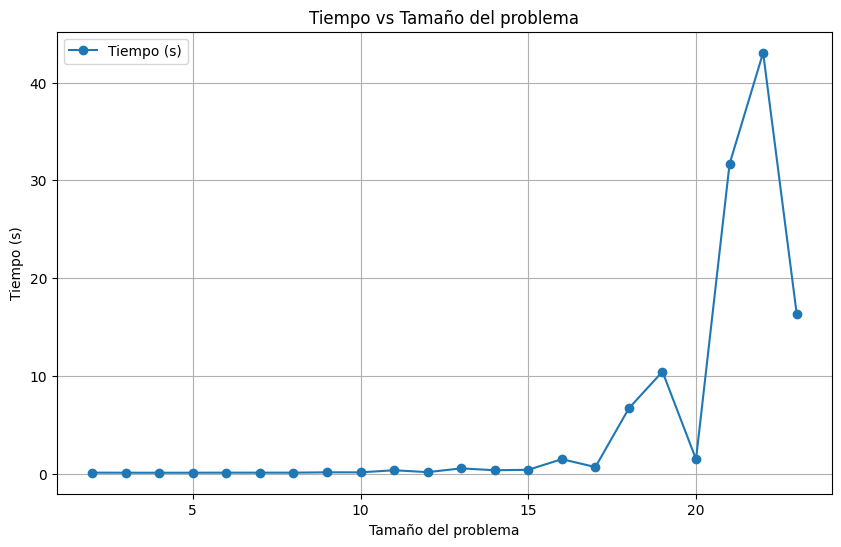

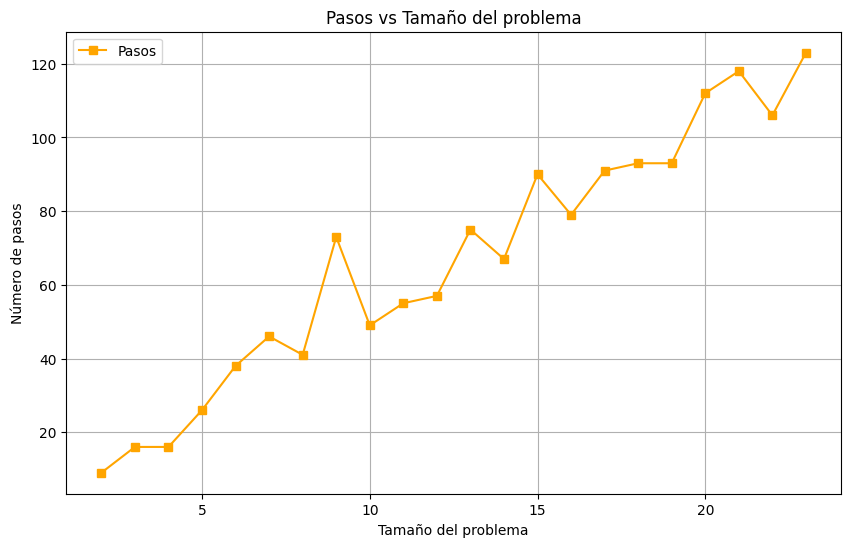

In [16]:
# Ya tienes importado pandas y matplotlib.pyplot, y results_csv_path está definido

# Cargar resultados
results = pd.read_csv(folder_path / "Ejercicio1/resultados_lpg-td.csv")

sizes = results['Tamaño']
times = results['Tiempo (s)']

# Comprobar columna de pasos (y descartar filas nulas)
if 'Pasos' in results.columns:
    steps = results['Pasos'].dropna()
    sizes_steps = results.loc[results['Pasos'].notna(), 'Tamaño']
else:
    steps = None

# Primer gráfico: Tiempo vs Tamaño
plt.figure(figsize=(10, 6))
plt.plot(sizes, times, marker='o', label='Tiempo (s)')
plt.xlabel('Tamaño del problema')
plt.ylabel('Tiempo (s)')
plt.title('Tiempo vs Tamaño del problema')
plt.grid(True)
plt.legend()
plt.show()

# Segundo gráfico: Pasos vs Tamaño (solo si existen pasos)
if steps is not None:
    plt.figure(figsize=(10, 6))
    plt.plot(sizes_steps, steps, marker='s', label='Pasos', color='orange')
    plt.xlabel('Tamaño del problema')
    plt.ylabel('Número de pasos')
    plt.title('Pasos vs Tamaño del problema')
    plt.grid(True)
    plt.legend()
    plt.show()

# SGPLAN40

In [9]:
from pathlib import Path
import os
import time
import subprocess
import pandas as pd
from tqdm.notebook import tqdm

# Asumimos que `folder_path` ya está definido
problem_path = folder_path / "Ejercicio1/Problemas"
if not problem_path.exists():
    os.makedirs(problem_path)

planner_name = "SGPLAN40"
planner_cmd = [
    f"{folder_path}/planificadores/sgplan40",
    "-o", f"{folder_path}/Ejercicio1/dron-domain.pddl"
]

max_time = 60
max_size = 0
sizes = []
times = []
steps_list = []
outputs = []

size = 2
time_exceeded = False

pbar = tqdm(desc="Resolviendo tamaño", unit="problema", position=0, leave=True)

while not time_exceeded:
    pbar.set_description(f"Tamaño actual: {size}")
    pbar.refresh()

    # Generar el problema PDDL de tamaño `size`
    gen_cmd = (
        f"python3 {folder_path}/generate_problem.py "
        f"-d 1 -r 0 -k 2 -l {size} -p {size} -c {size} -g {size} -v 0"
    )
    pbar.write(f"\n[INFO] Generando problema para tamaño {size}...")
    os.system(gen_cmd)

    pddl_files = sorted(
        problem_path.glob("*.pddl"),
        key=os.path.getmtime,
        reverse=True
    )
    if not pddl_files:
        pbar.write("[ERROR] No se encontró el archivo .pddl generado.")
        break
    problem_pddl = pddl_files[0]

    full_cmd = planner_cmd + ["-f", str(problem_pddl)]
    pbar.write(f"[INFO] Ejecutando planificador {planner_name} para tamaño {size}...")

    start = time.time()
    try:
        result = subprocess.run(full_cmd, timeout=max_time, capture_output=True, text=True)
        elapsed = time.time() - start

        if result.returncode == 0:
            # Buscar el archivo de plan más reciente (*.sol o *.plan)
            plan_files = sorted(
                list(Path(".").glob("*.sol")) + list(Path(".").glob("*.plan")),
                key=os.path.getmtime,
                reverse=True
            )
            if plan_files:
                with open(plan_files[0], "r") as plan_file:
                    plan_lines = plan_file.readlines()
                num_steps = sum(
                    1
                    for line in plan_lines
                    if line.strip() and not line.startswith(";") and "(" in line
                )
                # Guardar fragmento de plan leído desde el archivo
                plan_content = "".join(plan_lines)
                outputs.append(plan_content[:500])
                # Opcional: eliminar el archivo de plan para evitar acumulación
                os.remove(plan_files[0])
            else:
                pbar.write(f"[ERROR] No se encontró archivo de plan para {planner_name} tamaño {size}.")
                num_steps = 0
                outputs.append("")
            sizes.append(size)
            times.append(elapsed)
            steps_list.append(num_steps)
            max_size = size
        else:
            pbar.write(f"[ERROR] Planificador {planner_name} falló para tamaño {size}.")
            time_exceeded = True
    except subprocess.TimeoutExpired:
        pbar.write(f"[TIMEOUT] Planificador {planner_name} excedió tiempo para tamaño {size}.")
        time_exceeded = True

    os.remove(problem_pddl)
    pbar.update(1)
    size += 1

pbar.close()

print("\n=== Resumen de resultados ===\n")
print(f"Tamaño máximo resuelto por {planner_name}: {max_size}")

csv_path = folder_path / f"Ejercicio1/resultados_{planner_name.lower()}.csv"
df = pd.DataFrame({
    "Tamaño": sizes,
    "Tiempo (s)": times,
    "Pasos": steps_list
})
if csv_path.exists():
    old_df = pd.read_csv(csv_path)
    combined_df = pd.concat([old_df, df], ignore_index=True)
    final_df = combined_df.groupby('Tamaño', as_index=False)['Tiempo (s)'].mean()
    if 'Pasos' in combined_df.columns:
        pasos_df = combined_df.groupby('Tamaño', as_index=False)['Pasos'].max()
        final_df = final_df.merge(pasos_df, on='Tamaño')
else:
    final_df = df
final_df.to_csv(csv_path, index=False)
print(f"Resultados de {planner_name} exportados a {csv_path}")

if sizes:
    df_display = pd.DataFrame({
        "Tamaño": sizes,
        "Tiempo (s)": times,
        "Pasos plan": steps_list,
        "Planificador": planner_name
    })
    display(df_display)

if outputs:
    max_idx = sizes.index(max_size)
    print(f"\nSalida fragmento para {planner_name} tamaño {max_size}:\n")
    print(outputs[max_idx])
# Mostrar resultados finales
print("\n=== Resultados finales ===\n")


Resolviendo tamaño: 0problema [00:00, ?problema/s]


[INFO] Generando problema para tamaño 2...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 2...
[ERROR] No se encontró archivo de plan para SGPLAN40 tamaño 2.

[INFO] Generando problema para tamaño 3...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 3...
[ERROR] No se encontró archivo de plan para SGPLAN40 tamaño 3.

[INFO] Generando problema para tamaño 4...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 4...
[ERROR] No se encontró archivo de plan para SGPLAN40 tamaño 4.

[INFO] Generando problema para tamaño 5...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 5...
[ERROR] No se encontró archivo de plan para SGPLAN40 tamaño 5.

[INFO] Generando problema para tamaño 6...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 6...
[ERROR] No se encontró archivo de plan para SGPLAN40 tamaño 6.

[INFO] Generando problema para tamaño 7...
[INFO] Ejecutando planificador SGPLAN40 para tamaño 7...
[ERROR] No se encontró archivo de plan para SGPLAN40 tamaño 7.

[INFO] Generand

,Tamaño,Tiempo (s),Pasos plan,Planificador
0,2,0.001898,0,SGPLAN40
1,3,0.002387,0,SGPLAN40
2,4,0.002363,0,SGPLAN40
3,5,0.002649,0,SGPLAN40
4,6,0.007951,0,SGPLAN40
...,...,...,...,...
95,97,42.497925,0,SGPLAN40
96,98,41.809239,0,SGPLAN40
97,99,43.703078,0,SGPLAN40
98,100,54.733644,0,SGPLAN40



Salida fragmento para SGPLAN40 tamaño 101:



=== Resultados finales ===



In [14]:
import re

# Expresión regular para encontrar archivos con el patrón solicitado
soln_pattern = re.compile(r"drone_problem_d1_r0_l(\d+)_p\1_c\1_g\1_ct2\.pddl\.soln$")
step_line_pattern = re.compile(r"^\d+\.\d+:")  # líneas que empiezan por un decimal y dos puntos

# Leer el CSV existente
df_csv = pd.read_csv(csv_path)

# Crear un diccionario Tamaño -> índice en el DataFrame
size_to_idx = {row['Tamaño']: idx for idx, row in df_csv.iterrows()}

# Recorrer archivos en el directorio
for file in os.listdir(folder_path):
    match = soln_pattern.match(file)
    if match:
        size = int(match.group(1))
        file_path = folder_path / file
        with open(file_path, "r") as f:
            file_content = f.read()
            step_count = sum(
                1 for line in file_content.splitlines()
                if line.strip() and not line.strip().startswith(";") and "(" in line
            )
            print(file_content)
            print(step_count)
        # Añadir/actualizar la columna 'Pasos' en el DataFrame
        if size in size_to_idx:
            df_csv.at[size_to_idx[size], 'Pasos'] = step_count
        else:
            # Si no existe la fila, opcionalmente agregarla
            df_csv = pd.concat([df_csv, pd.DataFrame([{'Tamaño': size, 'Pasos': step_count}])], ignore_index=True)

# Guardar el CSV actualizado
df_csv.to_csv(csv_path, index=False)
print(f"Actualizado el número de pasos en {csv_path}")


; Time 13.48
; ParsingTime 0.00
; NrActions 293
; MakeSpan
; MetricValue

	 0.010:  (MOVER-DRONE DRON1 DEPOSITO LOC70)[0.000]
	 0.020:  (CARGAR_DRON DRON1 CRATE49 LOC70 N0 N1)[0.000]
	 0.030:  (MOVER-DRONE DRON1 LOC70 LOC52)[0.000]
	 0.040:  (CARGAR_DRON DRON1 CRATE72 LOC52 N1 N2)[0.000]
	 0.050:  (ENTREGAR PERSON52 CRATE49 COMIDA LOC52 DRON1 N1 N2)[0.000]
	 0.060:  (MOVER-DRONE DRON1 LOC52 LOC6)[0.000]
	 0.070:  (CARGAR_DRON DRON1 CRATE42 LOC6 N1 N2)[0.000]
	 0.080:  (ENTREGAR PERSON51 CRATE72 MEDICINA LOC6 DRON1 N1 N2)[0.000]
	 0.090:  (MOVER-DRONE DRON1 LOC6 LOC29)[0.000]
	 0.100:  (MOVER-DRONE DRON1 LOC29 LOC51)[0.000]
	 0.110:  (CARGAR_DRON DRON1 CRATE59 LOC51 N1 N2)[0.000]
	 0.120:  (ENTREGAR PERSON56 CRATE42 COMIDA LOC51 DRON1 N1 N2)[0.000]
	 0.130:  (MOVER-DRONE DRON1 LOC51 LOC70)[0.000]
	 0.140:  (CARGAR_DRON DRON1 CRATE17 LOC70 N1 N2)[0.000]
	 0.150:  (MOVER-DRONE DRON1 LOC70 LOC31)[0.000]
	 0.160:  (ENTREGAR PERSON1 CRATE59 MEDICINA LOC31 DRON1 N1 N2)[0.000]
	 0.170:  (MOVE

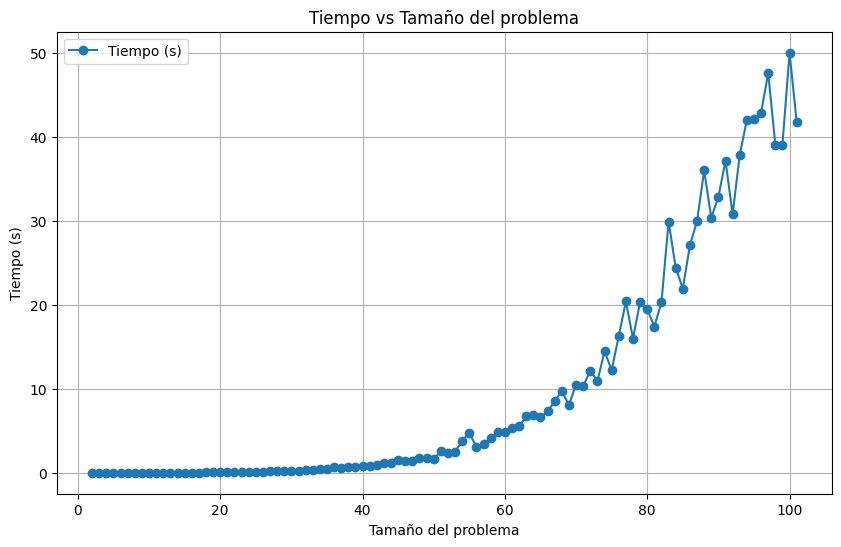

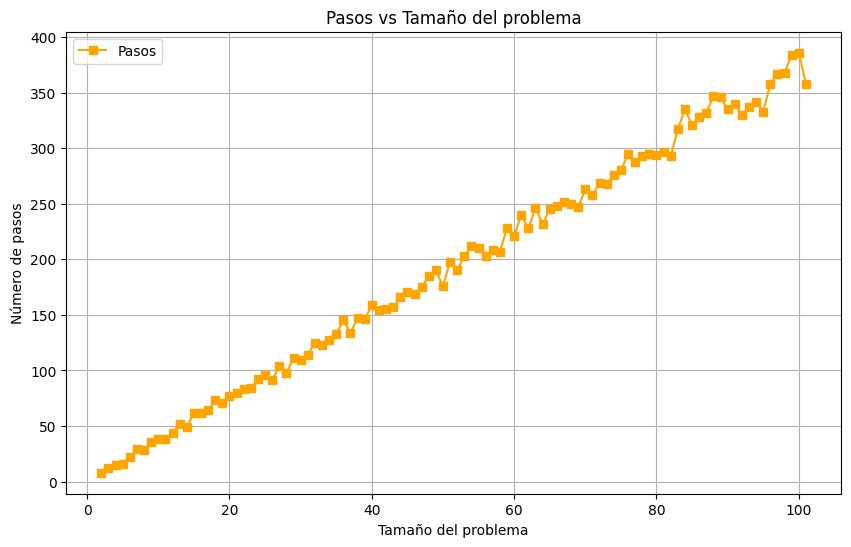

In [17]:
# Ya tienes importado pandas y matplotlib.pyplot, y results_csv_path está definido

# Cargar resultados
results = pd.read_csv(folder_path / "Ejercicio1/resultados_sgplan40.csv")

sizes = results['Tamaño']
times = results['Tiempo (s)']

# Comprobar columna de pasos (y descartar filas nulas)
if 'Pasos' in results.columns:
    steps = results['Pasos'].dropna()
    sizes_steps = results.loc[results['Pasos'].notna(), 'Tamaño']
else:
    steps = None

# Primer gráfico: Tiempo vs Tamaño
plt.figure(figsize=(10, 6))
plt.plot(sizes, times, marker='o', label='Tiempo (s)')
plt.xlabel('Tamaño del problema')
plt.ylabel('Tiempo (s)')
plt.title('Tiempo vs Tamaño del problema')
plt.grid(True)
plt.legend()
plt.show()

# Segundo gráfico: Pasos vs Tamaño (solo si existen pasos)
if steps is not None:
    plt.figure(figsize=(10, 6))
    plt.plot(sizes_steps, steps, marker='s', label='Pasos', color='orange')
    plt.xlabel('Tamaño del problema')
    plt.ylabel('Número de pasos')
    plt.title('Pasos vs Tamaño del problema')
    plt.grid(True)
    plt.legend()
    plt.show()